In [1]:
from manim import *

Manim Community v0.19.0

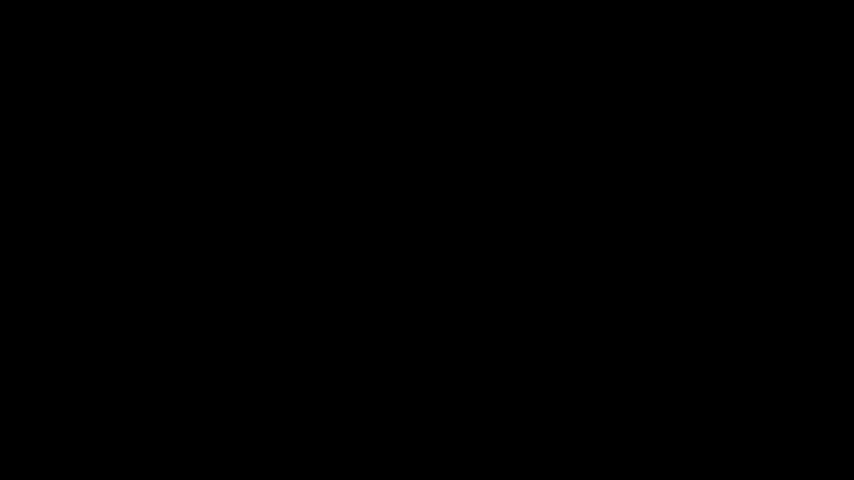

In [2]:
%%manim --format gif -ql -v Warning SomeAnimation

class SomeAnimation(Scene):
    def construct(self):
        square = Square()

        self.play(FadeIn(square))
        self.play(Rotate(square, PI/4))
        self.play(FadeOut(square))
        self.wait(1)

Manim Community v0.19.0

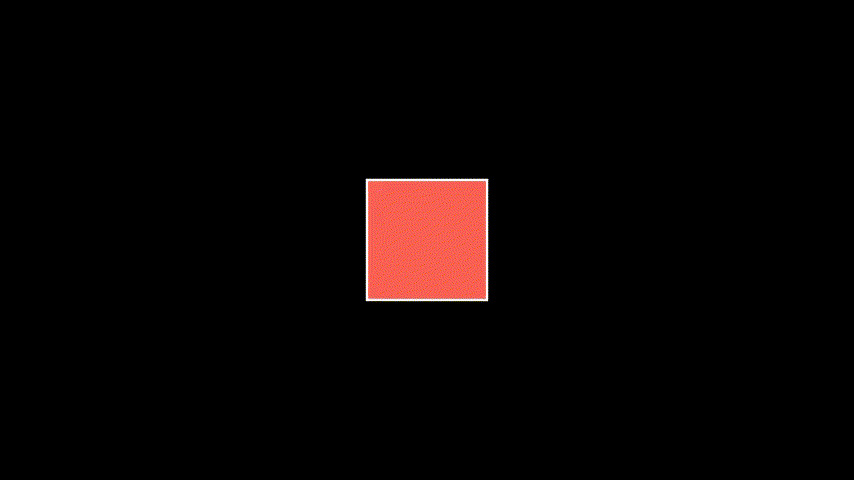

In [3]:
%%manim --format gif -ql -v Warning AnimateExample

class AnimateExample(Scene):
    def construct(self):
        square = Square().set_fill(RED, opacity=1.0)
        self.add(square)

        self.play(square.animate.set_fill(WHITE).rotate((PI/4)))
        self.play(square.animate.shift(UP*2).rotate(PI/4), run_time=1)
        self.play(square.animate.shift(DOWN*2).rotate(PI/4), run_time=1)
        self.play(square.animate.set_fill(RED).rotate(PI/4), run_time=1)

Manim Community v0.19.0

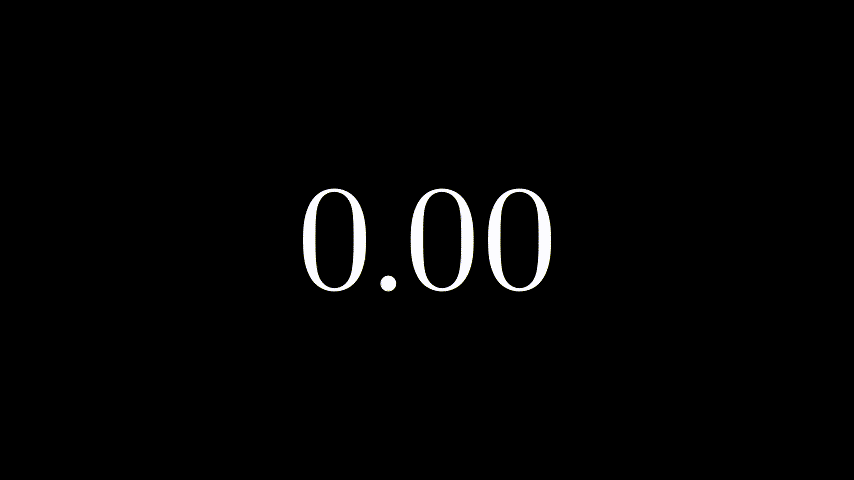

In [ ]:
%%manim --format gif -ql -v Warning CountingScene


class Count(Animation):
    def __init__(self, number: DecimalNumber, start:float, end: float, **kwargs) -> None:
        super().__init__(number, **kwargs)
        self.start = start
        self.end = end

    def interpolate_mobject(self, alpha:float) -> None:
        value = self.start + (alpha * (self.end - self.start))
        self.mobject.set_value(value)

class CountingScene(Scene):
    def construct(self):
        number = DecimalNumber().set_color(WHITE).scale(5)
        number.add_updater(lambda number: number.move_to(ORIGIN))
        self.add(number)
        self.wait()

        self.play(Count(number, 0, 100), run_time=4, rate_func=linear)
        self.wait()

Manim Community v0.19.0

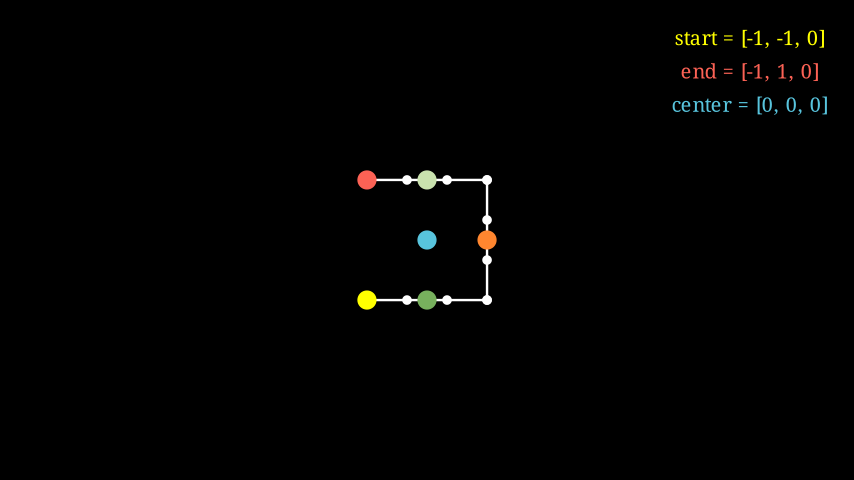

In [119]:
%%manim --format gif -ql -v Warning CoordinateMobject

class CoordinateMobject(Scene):
    def construct(self):

        p1 = [-1, -1,  0]
        p2 = [ 1, -1,  0]
        p3 = [ 1,  1,  0]
        p4 = [-1,  1,  0]

        a = (
            Line(p1, p2)
                .append_points(Line(p2, p3).points)
                .append_points(Line(p3, p4).points)
        )

        p_start = a.get_start()
        p_end = a.get_end()
        p_center = a.get_center()

        self.add(
            Text(f"start = {p_start.astype(int).tolist()}", font_size=24)
                .to_edge(UR)
                .set_color(YELLOW))
        self.add(
            Text(f"end = {p_end.astype(int).tolist()}", font_size=24)
                .next_to(self.mobjects[-1], DOWN)
                .set_color(RED) )
        self.add(
            Text(f"center = {p_center.astype(int).tolist()}", font_size=24)
                .next_to(self.mobjects[-1], DOWN)
                .set_color(BLUE) )
        self.add(*[Dot(x) for x in a.points])
        self.add(a)


        self.add(Dot(a.get_start()).set_color(YELLOW).scale(2))
        self.add(Dot(a.get_end()).set_color(RED).scale(2))
        self.add(Dot(a.get_top()).set_color(GREEN_A).scale(2))
        self.add(Dot(a.get_bottom()).set_color(GREEN_D).scale(2))
        self.add(Dot(a.get_center()).set_color(BLUE).scale(2))
        self.add(Dot(a.point_from_proportion(0.5)).set_color(ORANGE).scale(2))


In [ ]:
#  https://docs.manim.community/en/stable/tutorials/building_blocks.html#transforming-mobjects-into-other-mobjects